In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from glob import glob
import os
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
dirout = r'/Users/fadhlilrizki/Documents/PhD/GitHub/Local-CCEWs-Phase-Diagram/figures/statplot/'

path = r'/Users/fadhlilrizki/Documents/PhD/GitHub/Local-CCEWs-Phase-Diagram/dataout/txt/'  # or unix / linux / mac path
season = "SHAutumn"
wave   = "mjo"

pathEC = 'aave_'+wave+'_*_'+season+'_east_coast.txt'
pathCY = 'aave_'+wave+'_*_'+season+'_cape_york.txt'
pathTE = 'aave_'+wave+'_*_'+season+'_top_end.txt'
pathKY = 'aave_'+wave+'_*_'+season+'_kimberley.txt'

# Get the files from the path provided
all_files_EC = sorted(glob(os.path.join(path, pathEC )))
all_files_CY = sorted(glob(os.path.join(path, pathCY )))
all_files_TE = sorted(glob(os.path.join(path, pathTE )))
all_files_KY = sorted(glob(os.path.join(path, pathKY )))

In [330]:
all_files_KY

['/Users/fadhlilrizki/Documents/PhD/GitHub/Local-CCEWs-Phase-Diagram/dataout/txt/aave_mjo_P1_SHAutumn_kimberley.txt',
 '/Users/fadhlilrizki/Documents/PhD/GitHub/Local-CCEWs-Phase-Diagram/dataout/txt/aave_mjo_P2_SHAutumn_kimberley.txt',
 '/Users/fadhlilrizki/Documents/PhD/GitHub/Local-CCEWs-Phase-Diagram/dataout/txt/aave_mjo_P3_SHAutumn_kimberley.txt',
 '/Users/fadhlilrizki/Documents/PhD/GitHub/Local-CCEWs-Phase-Diagram/dataout/txt/aave_mjo_P4_SHAutumn_kimberley.txt',
 '/Users/fadhlilrizki/Documents/PhD/GitHub/Local-CCEWs-Phase-Diagram/dataout/txt/aave_mjo_P5_SHAutumn_kimberley.txt',
 '/Users/fadhlilrizki/Documents/PhD/GitHub/Local-CCEWs-Phase-Diagram/dataout/txt/aave_mjo_P6_SHAutumn_kimberley.txt',
 '/Users/fadhlilrizki/Documents/PhD/GitHub/Local-CCEWs-Phase-Diagram/dataout/txt/aave_mjo_P7_SHAutumn_kimberley.txt',
 '/Users/fadhlilrizki/Documents/PhD/GitHub/Local-CCEWs-Phase-Diagram/dataout/txt/aave_mjo_P8_SHAutumn_kimberley.txt',
 '/Users/fadhlilrizki/Documents/PhD/GitHub/Local-CCEWs-P

In [331]:
df_EC = pd.concat((pd.read_csv(f).assign(Phase=f'P{i+1}') for i, f in enumerate(all_files_EC)), ignore_index=True)

df_TE = pd.concat((pd.read_csv(f).assign(Phase=f'P{i+1}') for i, f in enumerate(all_files_TE)), ignore_index=True)

df_KY = pd.concat((pd.read_csv(f).assign(Phase=f'P{i+1}') for i, f in enumerate(all_files_KY)), ignore_index=True)

df_CY = pd.concat((pd.read_csv(f).assign(Phase=f'P{i+1}') for i, f in enumerate(all_files_CY)), ignore_index=True)


In [332]:
df_seas_EC    = df_EC[df_EC["Phase"]=='P9']
df_seas_TE    = df_TE[df_TE["Phase"]=='P9']
df_seas_KY    = df_KY[df_KY["Phase"]=='P9']
df_seas_CY    = df_CY[df_CY["Phase"]=='P9']

In [333]:
th_EC    = np.percentile(df_seas_EC["prob"], 67, axis=0)
th_TE    = np.percentile(df_seas_TE["prob"], 67, axis=0)
th_KY    = np.percentile(df_seas_KY["prob"], 67, axis=0)
th_CY    = np.percentile(df_seas_CY["prob"], 67, axis=0)

In [334]:
mean = np.mean(df_seas_EC["prob"])
mean

1.803234380148744

In [335]:
df_EC = df_EC.replace("P9","Season")
df_TE = df_TE.replace("P9","Season")
df_KY = df_KY.replace("P9","Season")
df_CY = df_CY.replace("P9","Season")

In [336]:
df_EC_plot     = df_EC[df_EC["Phase"].isin(["P1","P2","P3","P4","P5","P6","P7","P8","Season"])].rename(columns={'prob':'mm/day'})
df_TE_plot     = df_TE[df_TE["Phase"].isin(["P1","P2","P3","P4","P5","P6","P7","P8","Season"])].rename(columns={'prob':'mm/day'})
df_KY_plot     = df_KY[df_KY["Phase"].isin(["P1","P2","P3","P4","P5","P6","P7","P8","Season"])].rename(columns={'prob':'mm/day'})
df_CY_plot     = df_CY[df_CY["Phase"].isin(["P1","P2","P3","P4","P5","P6","P7","P8","Season"])].rename(columns={'prob':'mm/day'})


In [337]:

# fig, ax = plt.subplots(1,3, figsize=(18, 10))

# # sns.set_linestyle(style.values())
# sns.ecdfplot(data=df_west_plot ,
#               ax=ax[0],
#                 hue="Phase",
#                 x="mm/day",
# #                 bw_adjust = 0.08,
#                 log_scale=False,
#                 stat = 'proportion' ,
#                 linestyle = '-',
#                 palette = "Set2",
# #                 cumulative = True,
# #                 multiple = "dodge"#{“layer”, “dodge”, “stack”, “fill”}
#                )

# sns.ecdfplot(data=df_central_plot ,
#               ax=ax[1],
#                 hue="Phase",
#                 x="mm/day",
# #                 bw_adjust = 0.08,
#                 log_scale=False,
#                 stat = 'proportion' ,
#                 linestyle = '-',
#                 palette = "Set2",
# #                 cumulative = True,
# #                 multiple = "dodge"#{“layer”, “dodge”, “stack”, “fill”}
#                )

# sns.ecdfplot(data=df_east_plot ,
#               ax=ax[2],
#                 hue="Phase",
#                 x="mm/day",
# #                 bw_adjust = 0.08,
#                 log_scale=False,
#                 stat = 'proportion' ,
#                 linestyle = '-',
#                 palette = "Set2",
# #                 cumulative = True,
# #                 multiple = "dodge"#{“layer”, “dodge”, “stack”, “fill”}
#                )

# # plt.set_style(style)
# ax[0].axvline(th_west, 0,1, color="grey",linestyle = '--')
# ax[1].axvline(th_central, 0,1, color="grey",linestyle = '--')
# ax[2].axvline(th_east, 0,1, color="grey",linestyle = '--')

# ax[0].set_xlim(th_west-0.7,40)
# ax[1].set_xlim(th_central-0.7,40)
# ax[2].set_xlim(th_east-0.7,40)

# ax[0].set_ylim(0.6,1.)
# ax[1].set_ylim(0.6,1.)
# ax[2].set_ylim(0.6,1.)

# ax[0].set_title("North-AU Western Australia")
# ax[1].set_title("North-AU Northern Territory")
# ax[2].set_title("North-AU Queensland")
# # sns.color_palette("Set2")

0.48323


Text(0.5, 1.0, 'East Coast')

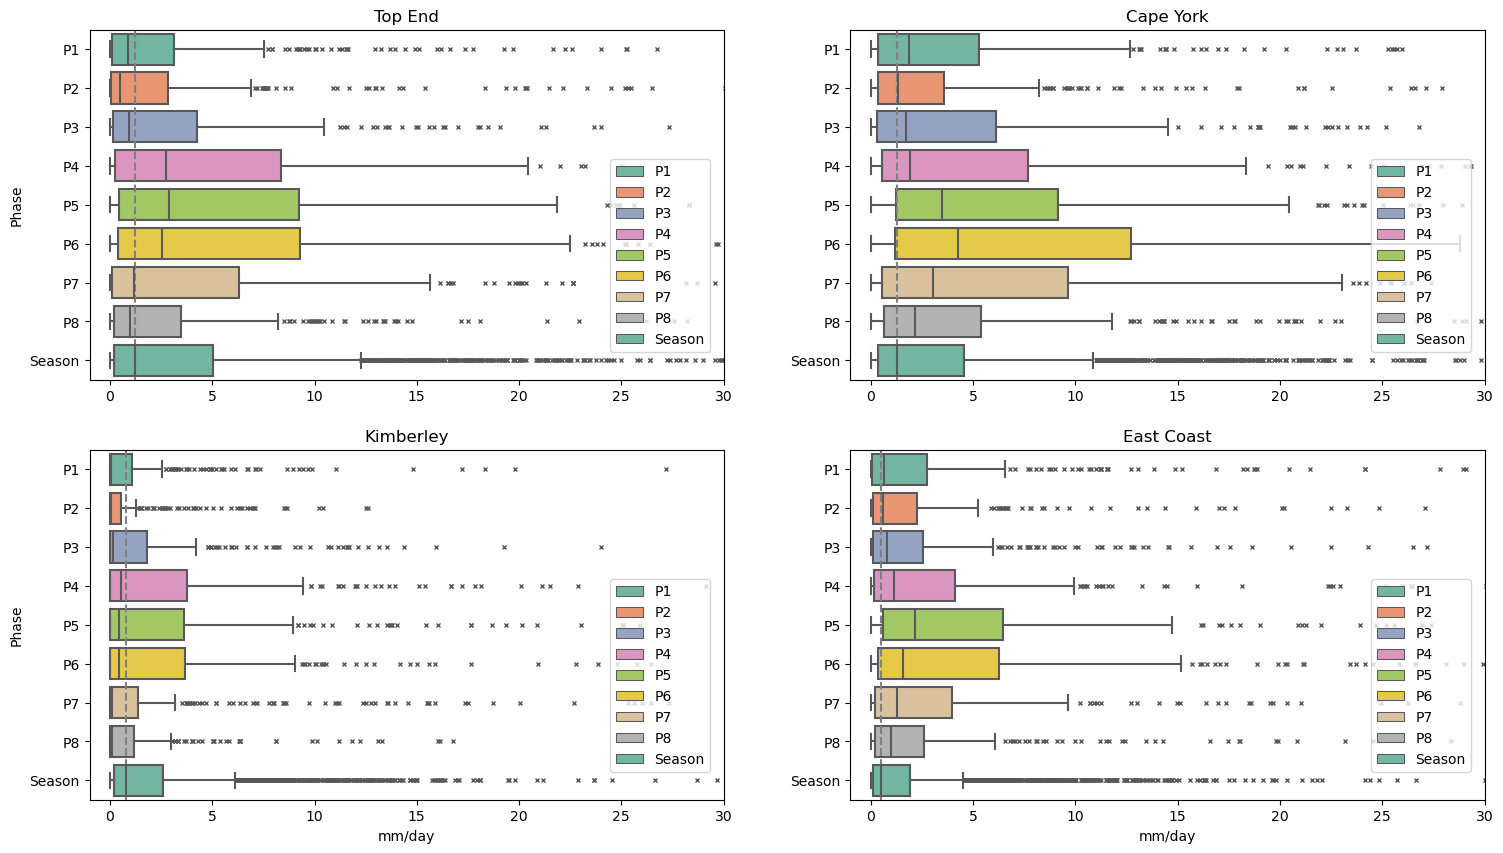

In [338]:

fig, ax = plt.subplots(2,2, figsize=(18, 10))

sns.boxplot(data=df_EC_plot, x='mm/day',y='Phase', hue="Phase",
            ax = ax[1,1],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            palette = 'Set2'
#            scale = "log"
           )

sns.boxplot(data=df_CY_plot, x='mm/day',y='Phase', hue="Phase",
            ax = ax[0,1],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            palette = 'Set2'
#            scale = "log"
           )

sns.boxplot(data=df_TE_plot, x='mm/day',y='Phase', hue="Phase",
            ax = ax[0,0],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            palette = 'Set2'
#            scale = "log"
           )

sns.boxplot(data=df_KY_plot, x='mm/day',y='Phase', hue="Phase",
            ax = ax[1,0],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
#             legend = False,
            palette = 'Set2'
#            scale = "log"
           )

sns.move_legend(
    ax[0,0], "upper left",
    bbox_to_anchor=(.81, .65), ncol=1, title=None, frameon=True,
)

sns.move_legend(
    ax[0,1], "upper left",
    bbox_to_anchor=(.81, .65), ncol=1, title=None, frameon=True,
)

sns.move_legend(
    ax[1,0], "upper left",
    bbox_to_anchor=(.81, .65), ncol=1, title=None, frameon=True,
)

sns.move_legend(
    ax[1,1], "upper left",
    bbox_to_anchor=(.81, .65), ncol=1, title=None, frameon=True,
)

plot_TE = df_TE_plot[df_TE["Phase"].isin(["Season"])]
med_TE  = plot_TE["mm/day"].median()

plot_CY = df_CY_plot[df_CY["Phase"].isin(["Season"])]
med_CY  = plot_CY["mm/day"].median()

plot_KY = df_KY_plot[df_KY["Phase"].isin(["Season"])]
med_KY  = plot_KY["mm/day"].median()

plot_EC = df_EC_plot[df_EC["Phase"].isin(["Season"])]
med_EC  = plot_EC["mm/day"].median()

print(med_EC)

ax[0,0].axvline(med_TE, 0,1, color="grey",linestyle = '--')
ax[0,1].axvline(med_CY, 0,1, color="grey",linestyle = '--')
ax[1,0].axvline(med_KY, 0,1, color="grey",linestyle = '--')
ax[1,1].axvline(med_EC, 0,1, color="grey",linestyle = '--')

ax[0,0].set_xlim(-1,30)
ax[0,1].set_xlim(-1,30)
ax[1,0].set_xlim(-1,30)
ax[1,1].set_xlim(-1,30)

# # ax[0].set_ylim(0.6,1.)
# # ax[1].set_ylim(0.6,1.)
# # ax[2].set_ylim(0.6,1.)

ax[0,0].set(xlabel= None)
ax[0,1].set(xlabel= None)
ax[1,1].set(ylabel= None)
ax[0,1].set(ylabel= None)

ax[0,0].set_title("Top End")
ax[0,1].set_title("Cape York")
ax[1,0].set_title("Kimberley")
ax[1,1].set_title("East Coast")

In [339]:
figname = 'boxplot_'+wave+'_'+season+'.png'
figpath = os.path.join(dirout, figname)
figpath

fig.savefig(figpath, bbox_inches='tight')

0.48323


Text(0.5, 1.0, 'East Coast')

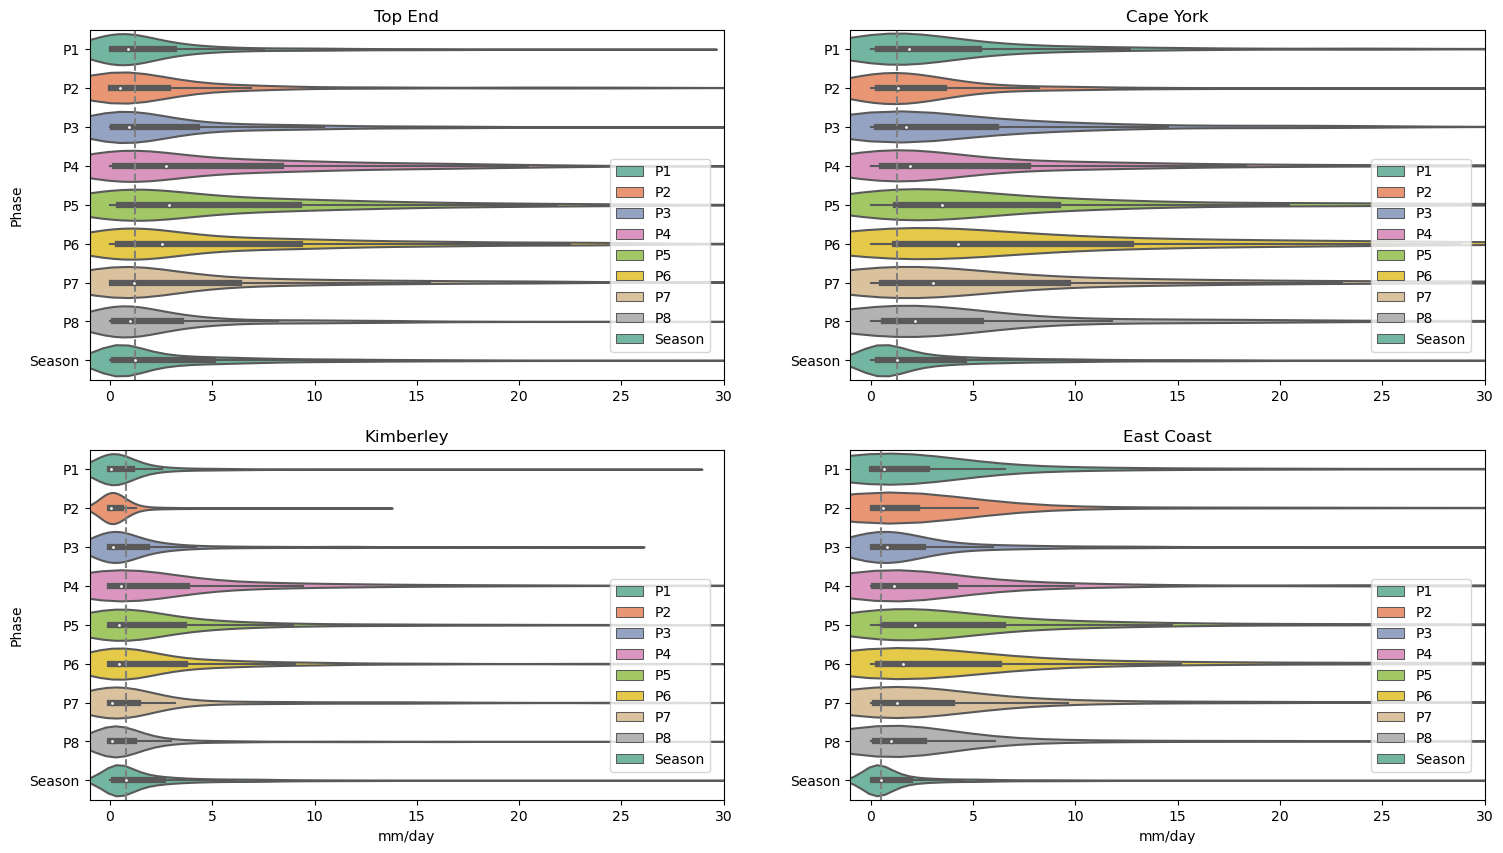

In [340]:

fig, ax = plt.subplots(2,2, figsize=(18, 10))

sns.violinplot(data=df_EC_plot, x='mm/day',y='Phase', hue="Phase",
            ax = ax[1,1],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            palette = 'Set2'
#            scale = "log"
           )

sns.violinplot(data=df_CY_plot, x='mm/day',y='Phase', hue="Phase",
            ax = ax[0,1],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            palette = 'Set2'
#            scale = "log"
           )

sns.violinplot(data=df_TE_plot, x='mm/day',y='Phase', hue="Phase",
            ax = ax[0,0],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
            palette = 'Set2'
#            scale = "log"
           )

sns.violinplot(data=df_KY_plot, x='mm/day',y='Phase', hue="Phase",
            ax = ax[1,0],
            flierprops={"marker": "x"},
            notch=False, showcaps=True,
            dodge = False,
            fliersize = 3,
#             legend = False,
            palette = 'Set2'
#            scale = "log"
           )

sns.move_legend(
    ax[0,0], "upper left",
    bbox_to_anchor=(.81, .65), ncol=1, title=None, frameon=True,
)

sns.move_legend(
    ax[0,1], "upper left",
    bbox_to_anchor=(.81, .65), ncol=1, title=None, frameon=True,
)

sns.move_legend(
    ax[1,0], "upper left",
    bbox_to_anchor=(.81, .65), ncol=1, title=None, frameon=True,
)

sns.move_legend(
    ax[1,1], "upper left",
    bbox_to_anchor=(.81, .65), ncol=1, title=None, frameon=True,
)

plot_TE = df_TE_plot[df_TE["Phase"].isin(["Season"])]
med_TE  = plot_TE["mm/day"].median()

plot_CY = df_CY_plot[df_CY["Phase"].isin(["Season"])]
med_CY  = plot_CY["mm/day"].median()

plot_KY = df_KY_plot[df_KY["Phase"].isin(["Season"])]
med_KY  = plot_KY["mm/day"].median()

plot_EC = df_EC_plot[df_EC["Phase"].isin(["Season"])]
med_EC  = plot_EC["mm/day"].median()

print(med_EC)

ax[0,0].axvline(med_TE, 0,1, color="grey",linestyle = '--')
ax[0,1].axvline(med_CY, 0,1, color="grey",linestyle = '--')
ax[1,0].axvline(med_KY, 0,1, color="grey",linestyle = '--')
ax[1,1].axvline(med_EC, 0,1, color="grey",linestyle = '--')

ax[0,0].set_xlim(-1,30)
ax[0,1].set_xlim(-1,30)
ax[1,0].set_xlim(-1,30)
ax[1,1].set_xlim(-1,30)

# # ax[0].set_ylim(0.6,1.)
# # ax[1].set_ylim(0.6,1.)
# # ax[2].set_ylim(0.6,1.)

ax[0,0].set(xlabel= None)
ax[0,1].set(xlabel= None)
ax[1,1].set(ylabel= None)
ax[0,1].set(ylabel= None)

ax[0,0].set_title("Top End")
ax[0,1].set_title("Cape York")
ax[1,0].set_title("Kimberley")
ax[1,1].set_title("East Coast")